# O PROBLEMA

Imagine que você foi escalado para um time de investimentos e precisará realizar um modelo preditivo com dados do IBOVESPA (Bolsa de Valores) para criar uma série temporal e prever diariamente o fechamento da base.

Para isso, utilize a base de dados contida no site da investing e selecione o período 'diário', com intervalo de tempo que achar adequado.

Você precisará demonstrar para o time de investimentos:

1. O modelo com storytelling, desde a captura do dado até a entrega do modelo;
2. Justificar a técnica utilizada;
3. Atingir uma acurácia adequada (acima de 70%).

Dica: utilize o maior intervalo de tempo possível para atingir maior acurácia no modelo preditivo.

Fonte: https://br.investing.com/indices/bovespa-historical-data

## Importando bibliotecas

In [618]:
import warnings 
warnings.filterwarnings(action = 'ignore')

In [619]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importando dados

In [620]:
df = pd.read_csv('Dados Históricos - Ibovespa.csv')

In [621]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      2478 non-null   object 
 1   Último    2478 non-null   float64
 2   Abertura  2478 non-null   float64
 3   Máxima    2478 non-null   float64
 4   Mínima    2478 non-null   float64
 5   Vol.      2477 non-null   object 
 6   Var%      2478 non-null   object 
dtypes: float64(4), object(3)
memory usage: 135.6+ KB


In [622]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,08.08.2023,119.090,119.378,119.553,117.492,"10,25M","-0,24%"
1,07.08.2023,119.380,119.509,120.104,118.894,"8,73M","-0,11%"
2,04.08.2023,119.508,120.586,121.442,119.215,"15,07M","-0,89%"
3,03.08.2023,120.586,120.859,122.619,120.365,"13,03M","-0,23%"
4,02.08.2023,120.859,121.249,121.252,119.798,"10,57M","-0,32%"


## Tratamento de dados

In [623]:
#verificando ocorrência de dados nulos
df.isna().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

In [624]:
df[df['Vol.'].isnull()]

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
1860,10.02.2016,40.377,40.592,40.592,39.96,NaN,"-0,53%"


In [625]:
#df.drop(1860, inplace = True)
df.isna().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

In [626]:
#verificando valores duplicados
df.duplicated().sum()

0

In [627]:
#verificando ocorrência de espaçamentos
espacamento_encontrado = False

for column in df.columns:
    for index, value in df[column].items():
        if isinstance(value, str) and value.isspace():
            print(f'Espaçamento encontrado na coluna "{column}", linha {index}.')
            espacamento_encontrado = True

if not espacamento_encontrado:
    print('Não há espaçamento nos dados.')

Não há espaçamento nos dados.


In [628]:
#renomeando colunas
df.rename(columns = {
    'Data': 'data', 
    'Último': 'ultimo', 
    'Abertura': 'abertura', 
    'Máxima': 'maxima', 
    'Mínima': 'minima', 
    'Vol.': 'volume', 
    'Var%': 
    'variacao'}, inplace = True)
df.columns

Index(['data', 'ultimo', 'abertura', 'maxima', 'minima', 'volume', 'variacao'], dtype='object')

In [629]:
#alterando tipo da coluna de data
df['volume'] = df['volume'].str.replace(',', '.')
df['volume'] = df['volume'].str.replace('K', '')
df['volume'] = df['volume'].str.replace('M', '').astype(float)
df['variacao'] = df['variacao'].str.replace(',', '.')
df['variacao'] = df['variacao'].str.replace('%', '').astype(float)
df['data'] = df['data'].str.replace('.', '-')
df['data'] = pd.to_datetime(df['data'], format='%d-%m-%Y')

In [630]:
df.head(3)

,data,ultimo,abertura,maxima,minima,volume,variacao
0,2023-08-08,119.090,119.378,119.553,117.492,10.25,-0.24
1,2023-08-07,119.380,119.509,120.104,118.894,8.73,-0.11
2,2023-08-04,119.508,120.586,121.442,119.215,15.07,-0.89


In [631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data      2478 non-null   datetime64[ns]
 1   ultimo    2478 non-null   float64       
 2   abertura  2478 non-null   float64       
 3   maxima    2478 non-null   float64       
 4   minima    2478 non-null   float64       
 5   volume    2477 non-null   float64       
 6   variacao  2478 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 135.6 KB


In [632]:
df.set_index('data', inplace = True)
df.head()

,ultimo,abertura,maxima,minima,volume,variacao
data,,,,,,
2023-08-08,119.090,119.378,119.553,117.492,10.25,-0.24
2023-08-07,119.380,119.509,120.104,118.894,8.73,-0.11
2023-08-04,119.508,120.586,121.442,119.215,15.07,-0.89
2023-08-03,120.586,120.859,122.619,120.365,13.03,-0.23
2023-08-02,120.859,121.249,121.252,119.798,10.57,-0.32


In [633]:
df.describe()

,ultimo,abertura,maxima,minima,volume,variacao
count,2478.000000,2478.000000,2478.000000,2478.000000,2477.000000,2478.000000
mean,81.926914,81.899014,82.697740,81.120072,8.059298,0.049730
std,26.127776,26.126124,26.307075,25.923727,34.122577,1.581361
min,37.497000,37.501000,38.031000,37.046000,1.190000,-14.780000
25%,54.721750,54.686750,55.208000,54.153500,3.480000,-0.807500
50%,81.377000,81.316500,82.653500,80.709500,4.670000,0.055000
75%,106.276500,106.264000,107.201500,105.203750,9.660000,0.930000
max,130.776000,130.776000,131.190000,129.526000,980.070000,13.910000


In [634]:
df = df['ultimo'].to_frame(name = 'ultimo')
df

,ultimo
data,
2023-08-08,119.090
2023-08-07,119.380
2023-08-04,119.508
2023-08-03,120.586
2023-08-02,120.859
...,...
2013-08-14,50.896
2013-08-13,50.601
2013-08-12,50.299


## Decompondo a série

In [635]:
from statsmodels.tsa.seasonal import seasonal_decompose #lib para decompor série temporal
from statsmodels.tsa.stattools import acf, pacf #autocorrelação e autocorrelação parcial

In [636]:
df.sort_index(inplace = True)

In [637]:
resultados = seasonal_decompose(df, period = 7)

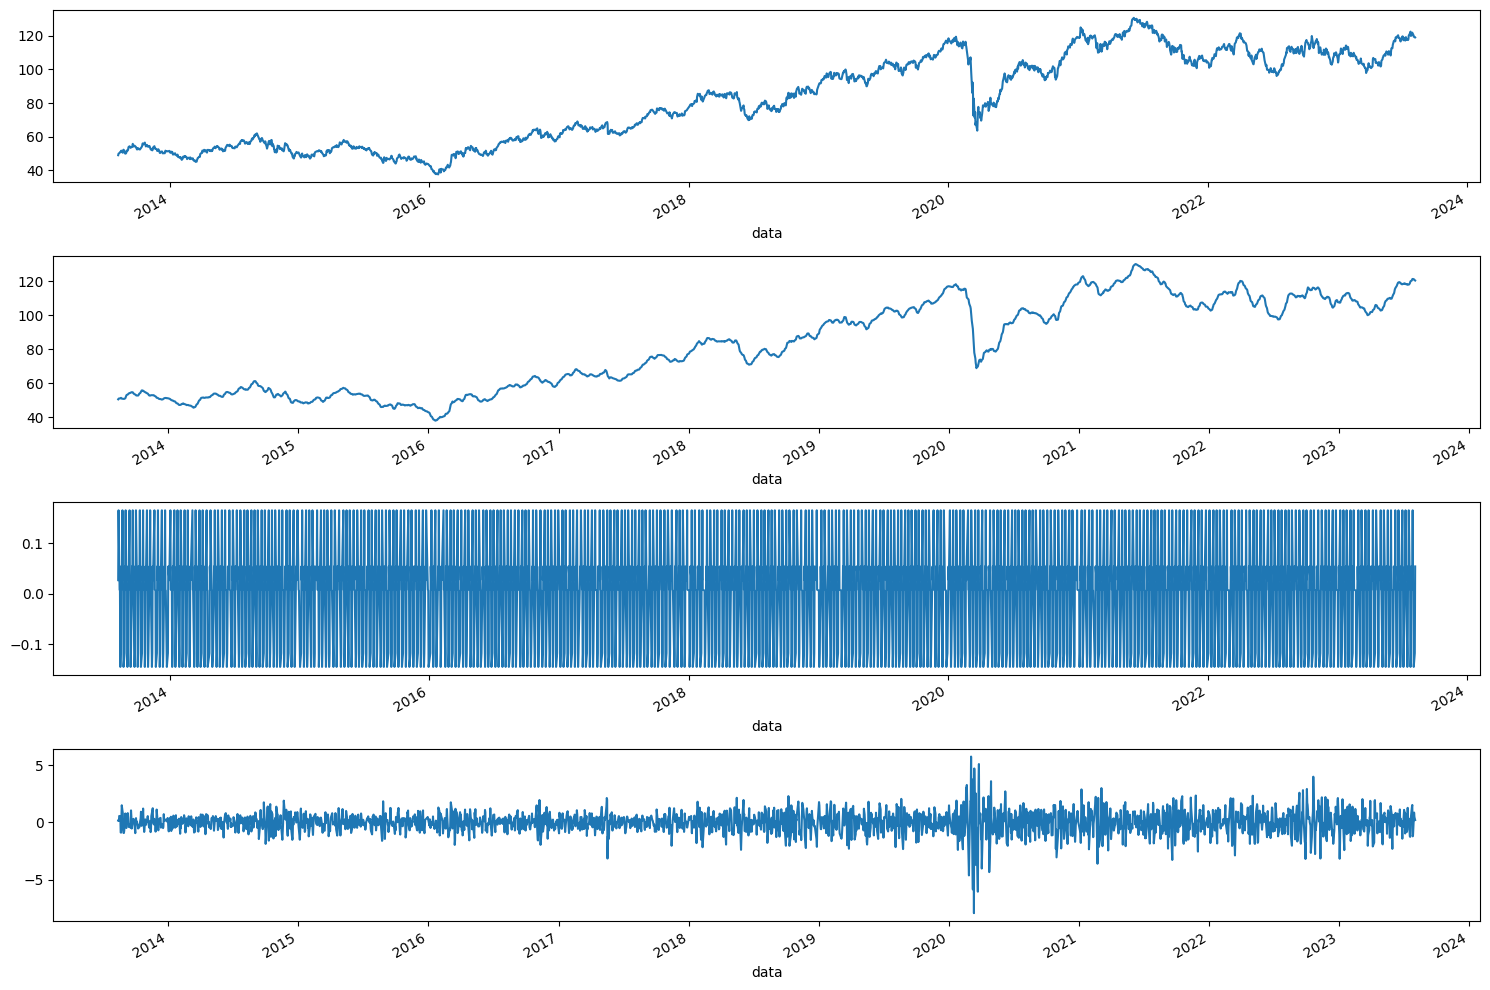

In [638]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (15, 10))
resultados.observed.plot(ax = ax1)
resultados.trend.plot(ax = ax2)
resultados.seasonal.plot(ax = ax3)
resultados.resid.plot(ax = ax4)
plt.tight_layout()

### ADF - Augmented Dickey-Fuller

>H0 - Hipótese Nula (não é estacionária)

>H1 - Hipótese Alternativa (rejeita a hipótese nula)

**p-valor <= 0.05 rejeitamos H0 com um nível de confiança de 95%**

In [639]:
from statsmodels.tsa.stattools import adfuller

In [640]:
X = df.ultimo.values

result = adfuller(X)

print('Teste ADF')
print(f'Teste estatístico: {result[0]}')
print(f'P-valor: {result[1]}')
print(f'Valores críticos:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

Teste ADF
Teste estatístico: -1.1118195807499645
P-valor: 0.7103354498700571
Valores críticos:
	1%: -3.4330002465470844
	5%: -2.862710858596359
	10%: -2.567393294431969


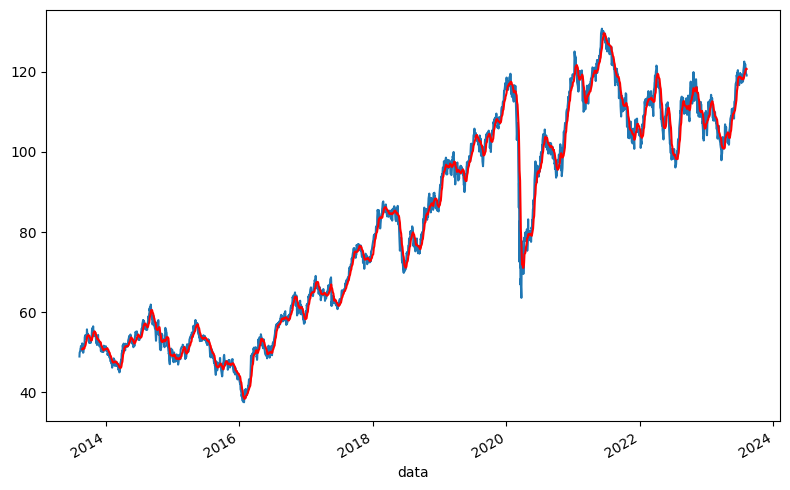

In [641]:
ma = df.rolling(12).mean()

f, ax = plt.subplots(figsize=(8,5))

df.plot(ax = ax, legend = False)
ma.plot(ax = ax, legend = False, color = 'r')
plt.tight_layout()

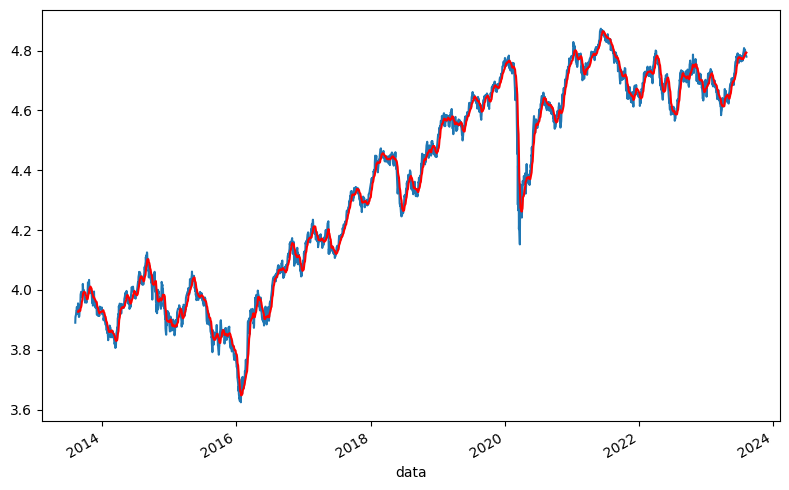

In [642]:
df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

f, ax = plt.subplots(figsize=(8,5))
df_log.plot(ax = ax, legend = False)
ma_log.plot(ax = ax, legend = False, color = 'r')
plt.tight_layout()

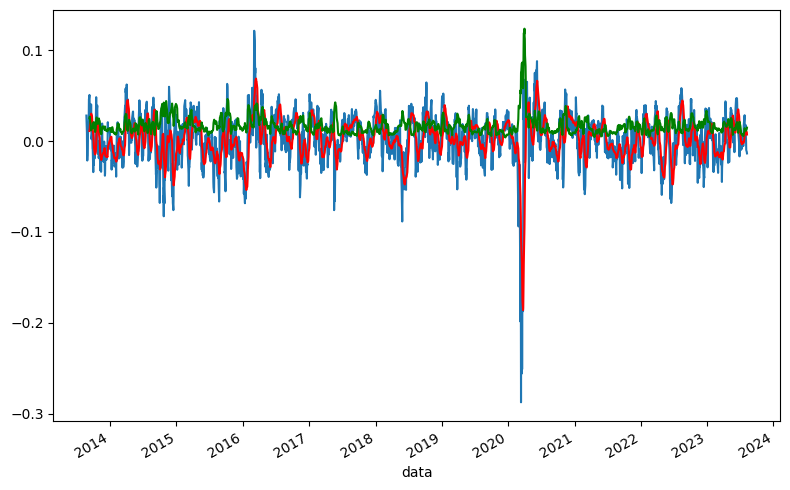

In [643]:
df_s = (df_log - ma_log).dropna()
ma_s = df_s.rolling(12).mean()
std_s = df_s.rolling(12).std()

f, ax = plt.subplots(figsize=(8,5))
df_s.plot(ax = ax, legend = False)
ma_s.plot(ax = ax, legend = False, color = 'r')
std_s.plot(ax = ax, legend = False, color = 'g')
plt.tight_layout()

In [644]:
X_s = df_s.ultimo.values

result_s = adfuller(X_s)

print('Teste ADF')
print(f'Teste estatístico: {result_s[0]}')
print(f'P-valor: {result_s[1]}')
print(f'Valores críticos:')

for key, value in result_s[4].items():
    print(f'\t{key}: {value}')

Teste ADF
Teste estatístico: -12.846961530690207
P-valor: 5.454347712436534e-24
Valores críticos:
	1%: -3.4330121144728767
	5%: -2.86271609941438
	10%: -2.567396084723173


Teste ADF
Teste estatístico: -15.837385329287336
P-valor: 9.782710744273273e-29
Valores críticos:
	1%: -3.433031765678395
	5%: -2.8627247772449245
	10%: -2.567400704939732


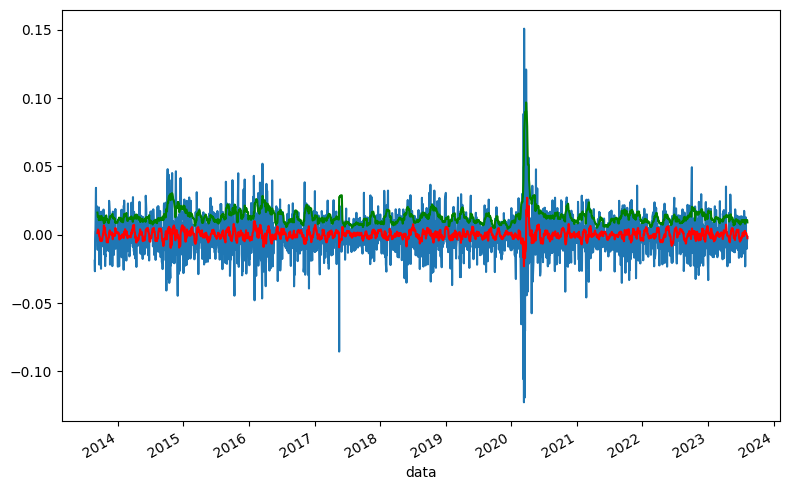

In [645]:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()

f, ax = plt.subplots(figsize=(8,5))
df_diff.plot(ax = ax, legend = False)
ma_diff.plot(ax = ax, legend = False, color = 'r')
std_diff.plot(ax = ax, legend = False, color = 'g')
plt.tight_layout()

X_diff = df_diff.ultimo.dropna().values

result_diff = adfuller(X_diff)

print('Teste ADF')
print(f'Teste estatístico: {result_diff[0]}')
print(f'P-valor: {result_diff[1]}')
print(f'Valores críticos:')

for key, value in result_diff[4].items():
    print(f'\t{key}: {value}')

## ARIMA

### ARIMA - AR (autoregressivo) I (integrado) MA (média móvel)

#### A (x, y, z) -> ACF, PACF

In [646]:
lag_acf = acf(df_diff.dropna(), nlags = 25) #trabalhando na base mensal
lag_pacf = pacf(df_diff.dropna(), nlags = 25)

### 5% ACF

##### 1.96 / sqrt(N - d) -> N (número de pontos da base), d (número de vezes que diferenciamos a base)

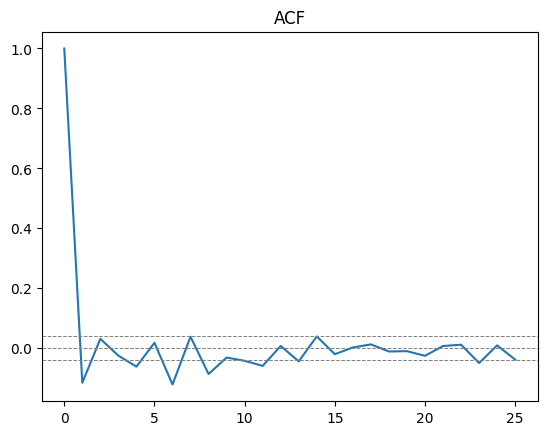

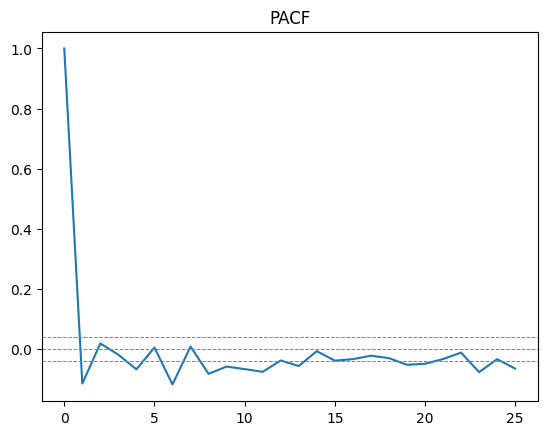

In [647]:
plt.plot(lag_acf)
plt.axhline(y = -1.96 / (np.sqrt(len(df_diff) -1)), linestyle = '--', color = 'gray', linewidth = 0.7)
plt.axhline(y = 0, linestyle = '--', color = 'gray', linewidth = 0.7)
plt.axhline(y = 1.96 / (np.sqrt(len(df_diff) -1)), linestyle = '--', color = 'gray', linewidth = 0.7)

plt.title('ACF')
plt.show()

plt.plot(lag_pacf)
plt.axhline(y = -1.96 / (np.sqrt(len(df_diff) -1)), linestyle = '--', color = 'gray', linewidth = 0.7)
plt.axhline(y = 0, linestyle = '--', color = 'gray', linewidth = 0.7)
plt.axhline(y = 1.96 / (np.sqrt(len(df_diff) -1)), linestyle = '--', color = 'gray', linewidth = 0.7)

plt.title('PACF')
plt.show()

In [648]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Modelando

### ARIMA

Método estatístico que utiliza autoregressão e médias móveis para previsão de séries temporais. Um modelo linear é construído incluindo um número especificado de termos e os dados são preparados por um nível de diferenciação afim de tornar este estacionário.

Podemos usar um valor 0 para desligar um parâmetro, dessa forma, aquela função em questão não será feita, por exemplo, se no parâmetro d definirmos 0 não será realizada uma diferenciação nos dados. Neste exemplo teríamos um modelo **ARMA**.

---

*   **AR**: *Autoregression* : um modelo que usa a relação dependende entre uma observação e alguns lags.

*   **I**: *Integrated*  : uso de diferenciação nas observações brutas, exemplo: subtração do valor de uma observação com sua observação anterior. O objetivo é transformar a série temporal em estacionária.

*  **MA**: *Moving Average* : um modelo que usa a dependência entre a observação e o erro residual a partir de um modelo de média móvel aplicado a lags.

          residual error = expected − predicted
    
- Isso é diferente de **Moving Average Smoothing.**
- Erros residuais contém estruturas temporais que podem ser modeladas.
- Existem sinais complexos nos erros residuais.
- Um modelo que prever o erro residual pode ser usado para ajustar os próximos erros e melhorar um modelo que aprende com o histórico.




---

O modelo arima contém alguns parâmetros


```
# ARIMA(p,d,q)
```
*   **p:** O número de lags que foram devem ser incluídos no modelo.
*   **d:** O número de vezes que as observações serão diferenciadas.
*   **q:** O tamanho de uma janela de média móvel. Também chamada de ordem de média móvel.

In [649]:
df_arima = df[(df.index >= '2022-01-01') & (df.index < '2023-01-01')]
df_arima.head()

,ultimo
data,
2022-01-03,103.922
2022-01-04,103.514
2022-01-05,101.006
2022-01-06,101.561
2022-01-07,102.719


In [650]:
from pandas.plotting import autocorrelation_plot

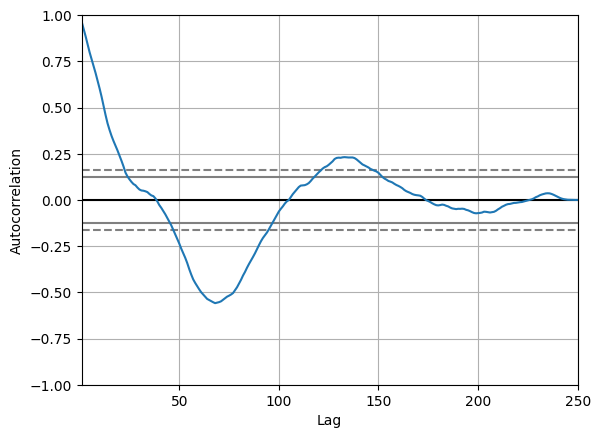

In [651]:
#autocorrelation plot 
autocorrelation_plot(df_arima.values)
plt.show()

In [652]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

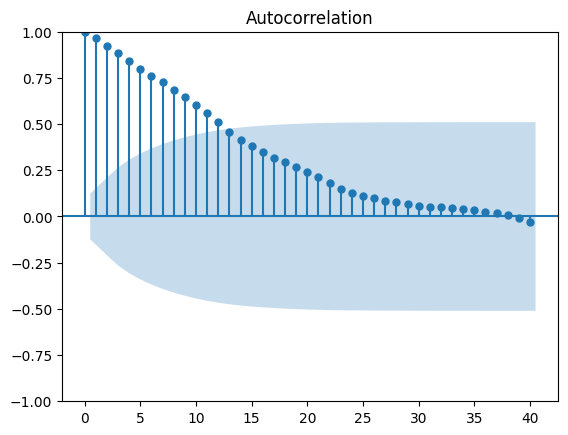

In [653]:
plot_acf(df_arima.values, lags = 40)
plt.show()

Modelo ARIMA para análise de dados

In [654]:
#fit model
from statsmodels.tsa.arima.model import ARIMA

In [655]:
#ARIMA(p, d, q)
model = ARIMA(df_arima, order = (7, 1, 1))

In [656]:
model_fit = model.fit()

In [657]:
#summary 
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 ultimo   No. Observations:                  250
Model:                 ARIMA(7, 1, 1)   Log Likelihood                -443.785
Date:                Mon, 14 Aug 2023   AIC                            905.570
Time:                        16:13:36   BIC                            937.227
Sample:                             0   HQIC                           918.312
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6752      0.614      1.099      0.272      -0.529       1.879
ar.L2         -0.0875      0.098     -0.896      0.370      -0.279       0.104
ar.L3          0.0917      0.076      1.207      0.2

In [658]:
#plot residuais
residuals = pd.DataFrame(model_fit.resid)

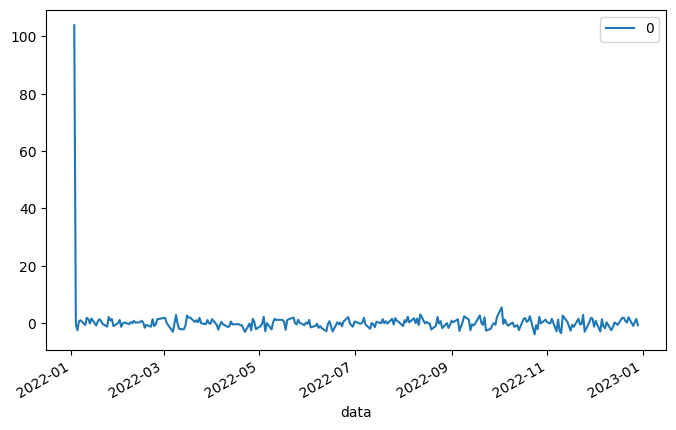

In [659]:
residuals.plot(figsize=(8,5))
plt.show()

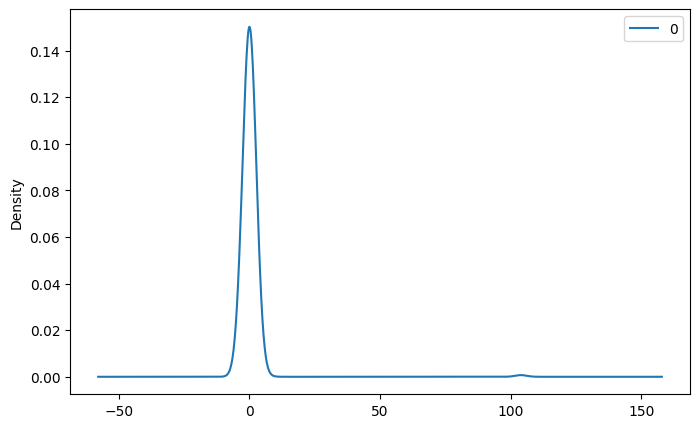

In [660]:
#gráficos de densidade dos residuais
residuals.plot(kind='kde', figsize=(8,5))
plt.show()

In [661]:
#estatística descritiva dos residuos
print(residuals.describe())

                0
count  250.000000
mean     0.436689
std      6.726753
min     -3.891635
25%     -0.745174
50%     -0.007375
75%      1.093942
max    103.922000


### Prevendo dados com ARIMA utilizando Walk Forward

Separando os dados de treino e teste

In [662]:
#a variável X recebe os dados da série
X = df_arima.values
X = X.astype('float32')

In [663]:
#separa os dados com 50% dos dados para treino e 50% dos dados para teste
size = int(len(X) * 0.5)

In [664]:
#separa dados de treino e teste
train = X[0:size]
test =  X[size:]

In [665]:
#cria a variável history
history = [x for x in train]

In [666]:
#cria lista de previsões
predictions = list()

In [667]:
#cria a função que faz a diferenciação
def difference(dataset, interval = 1):
  diff = list() 
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff

#cria função que reverte o valor diferenciado para o original
def inverse_difference(history, previsao, interval = 1):
  return previsao + history[-interval]

In [668]:
#inicia Walk-Forward
for t in range(len(test)):
  
  #difference data
  intervalo = 1
  diff = difference(history, intervalo)

  #cria um modelo ARIMA com os dados de history
  model = ARIMA(diff, order = (1, 0, 1))

  #treina o modelo ARIMA
  model_fit = model.fit()

  #a variável valor_predito recebe o valor previsto pelo modelo
  valor_predito = model_fit.forecast()[0]

  #valor_predito recebe o valor revertido (escala original)
  valor_predito = inverse_difference(history, valor_predito, intervalo)
    
  #adiciona o valor predito na lista de predicões
  predictions.append(valor_predito)

  #a variável valor_real recebe o valor real do teste
  valor_real = test[t]

  #adiciona o valor real a variável history
  history.append(valor_real)

  #imprime valor predito e valor real
  print('Valor predito = %.3f, Valor esperado = %3.f' % (valor_predito, valor_real))

Valor predito = 99.065, Valor esperado =  99
Valor predito = 98.451, Valor esperado =  98


Valor predito = 98.243, Valor esperado =  99
Valor predito = 98.773, Valor esperado = 101
Valor predito = 101.080, Valor esperado = 100
Valor predito = 100.041, Valor esperado =  98
Valor predito = 97.863, Valor esperado =  98
Valor predito = 98.381, Valor esperado =  98
Valor predito = 97.701, Valor esperado =  96
Valor predito = 95.787, Valor esperado =  97
Valor predito = 96.719, Valor esperado =  97
Valor predito = 96.837, Valor esperado =  98
Valor predito = 98.482, Valor esperado =  98
Valor predito = 98.138, Valor esperado =  99
Valor predito = 99.194, Valor esperado =  99
Valor predito = 98.793, Valor esperado = 100
Valor predito = 100.543, Valor esperado = 100
Valor predito = 99.543, Valor esperado = 101
Valor predito = 101.785, Valor esperado = 103
Valor predito = 102.670, Valor esperado = 103
Valor predito = 103.237, Valor esperado = 102
Valor predito = 102.015, Valor esperado = 103
Valor predito = 103.628, Valor esperado = 104
Valor predito = 103.760, Valor esperado = 106
V

In [669]:
#avaliando os resultados
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.625


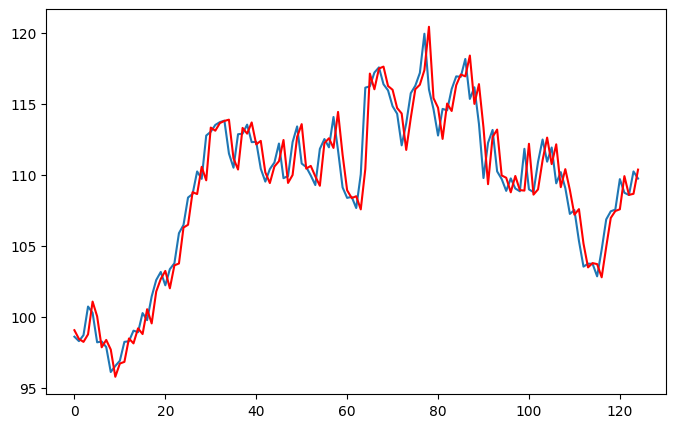

In [670]:
#plot forecasts against actual outcomes 
plt.figure(figsize=(8,5))
plt.plot(test)
plt.plot(predictions, color = 'red')
plt.show()

#### `Analisando Resíduos`

      Erro Residual = Valor esperado − Valor Predito

- Erros residuais são erros em previsões de séries temporais.
- Uma análise dos erros pode sugerir melhoras no modelo.
  - Tendências.
  - Sazonalidades.

In [671]:
#erros residuais 
residuals = [test[i] - predictions[i] for i in range(len(test))]

In [672]:
#converte a lista em um dataframe
residuals = pd.DataFrame(residuals)

In [673]:
#imprime as 5 primeiras linhas
residuals.head()

,0
0,-0.456161
1,-0.155724
2,0.475937
3,1.957481
4,-0.790642


In [674]:
#estatística descritiva
residuals.describe()

,0
count,125.000000
mean,0.046342
std,1.631095
min,-4.405914
25%,-0.845360
50%,0.086937
75%,1.170372
max,5.723450


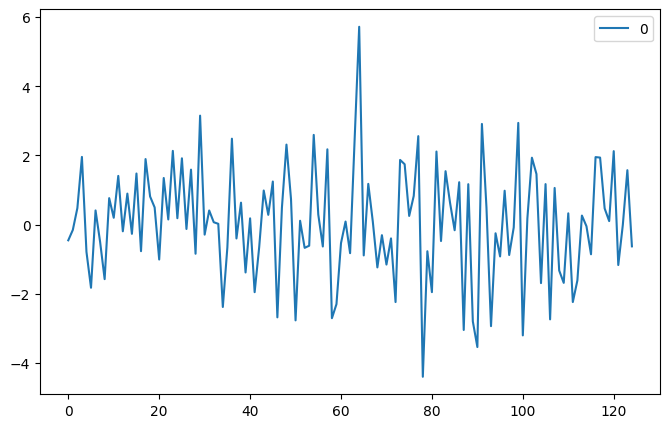

In [675]:
#plot residuals
residuals.plot(figsize=(8,5))
plt.show()

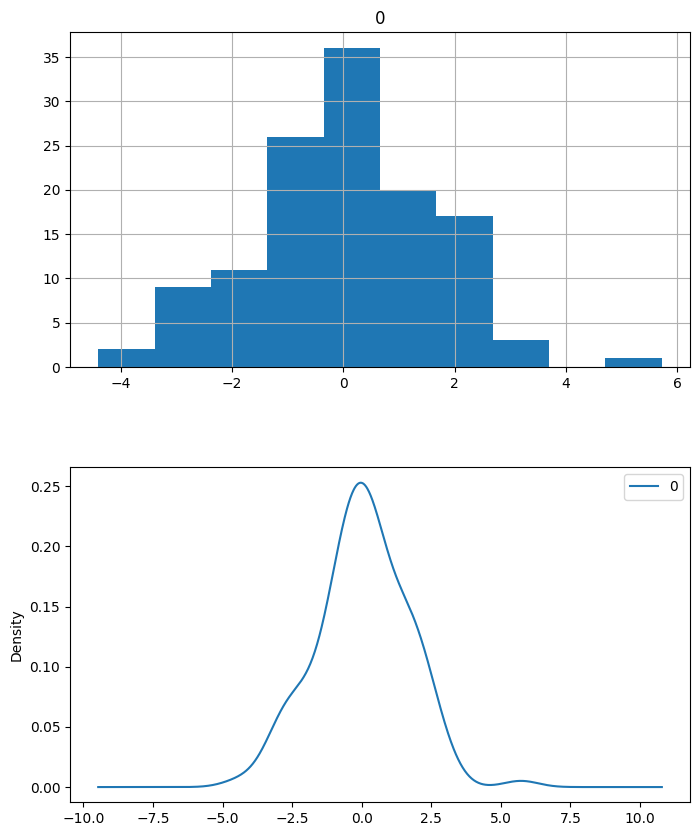

In [676]:
#plots histograma
plt.figure(figsize=(8,10))
plt.subplot(2, 1, 1)
residuals.hist(ax = plt.gca())

plt.subplot(2, 1, 2)
residuals.plot(kind = 'kde', ax = plt.gca())
plt.show()

In [677]:
#importa os pacotes de autocorrelação
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

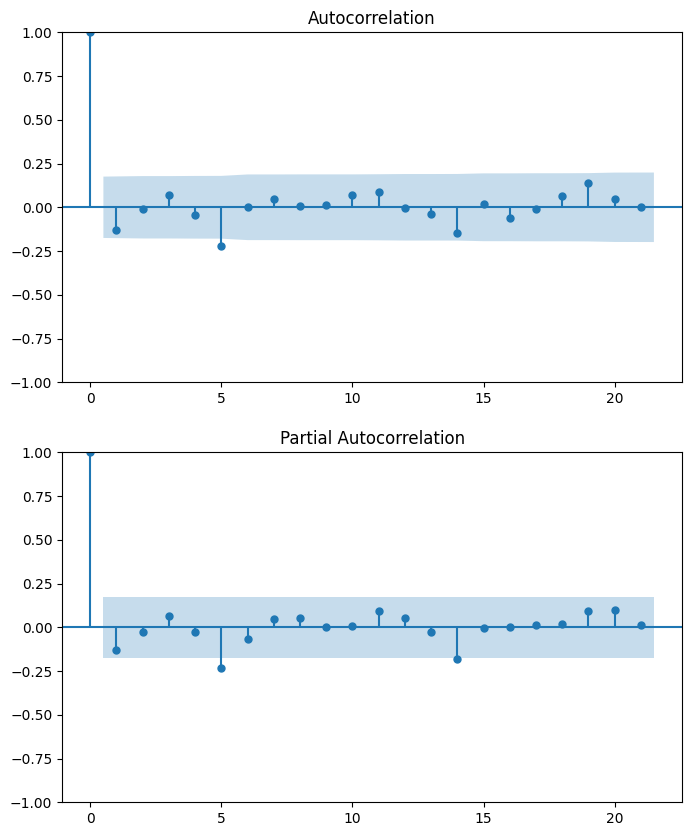

In [678]:
#plots de autocorrelação
plt.figure(figsize=(8,10)) 
plt.subplot(2, 1, 1)
plot_acf(residuals, ax = plt.gca())
plt.subplot(2, 1, 2)
plot_pacf(residuals, ax = plt.gca())
plt.show()

### Prophet

In [679]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [718]:
df.head()

,ds,y
0,2013-08-08,48.929
1,2013-08-09,49.875
2,2013-08-12,50.299
3,2013-08-13,50.601
4,2013-08-14,50.896


In [682]:
df_prophet = df
df_prophet.rename(columns = {'data': 'ds', 'ultimo': 'y'}, inplace = True)
df_prophet.tail()

,ds,y
2473,2023-08-02,120.859
2474,2023-08-03,120.586
2475,2023-08-04,119.508
2476,2023-08-07,119.380
2477,2023-08-08,119.090


In [726]:
treino = df.loc[df_prophet['ds'] < '2023-01-01'] #dados de treino
valid = df.loc[(df_prophet['ds'] >= '2023-01-01') & (df_prophet['ds'] < '2023-08-08')] #dados de validação (3 meses), quanto maior o período de predição, maior a largura de banda (maior o erro)
h = valid['ds'].nunique() #datas distintas no intervalo (90 dias)

In [724]:
h

150

In [703]:
treino.tail()

,ds,y
2322,2022-12-23,109.698
2323,2022-12-26,108.738
2324,2022-12-27,108.578
2325,2022-12-28,110.237
2326,2022-12-29,109.735


In [727]:
m = Prophet()
m.fit(treino)

16:22:52 - cmdstanpy - INFO - Chain [1] start processing
16:22:53 - cmdstanpy - INFO - Chain [1] done processing


In [728]:
future = m.make_future_dataframe(periods=150)
future.head()

,ds
0,2013-08-08
1,2013-08-09
2,2013-08-12
3,2013-08-13
4,2013-08-14


In [729]:
valid.head()

,ds,y
2327,2023-01-02,106.376
2328,2023-01-03,104.166
2329,2023-01-04,105.334
2330,2023-01-05,107.641
2331,2023-01-06,108.964


In [723]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2013-08-08,51.822204,44.779246,58.592483
1,2013-08-09,51.817951,44.446503,58.218212
2,2013-08-12,51.629516,44.650530,59.058935
3,2013-08-13,51.546101,44.860796,59.006581
4,2013-08-14,51.487439,44.664990,58.772396


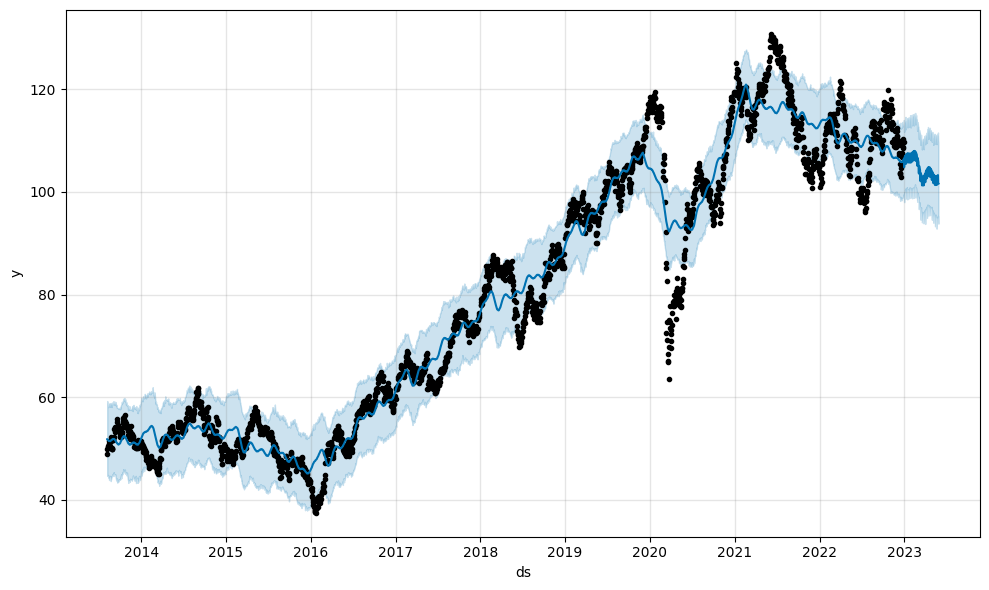

In [713]:
fig1 = m.plot(forecast)
fig1.show()

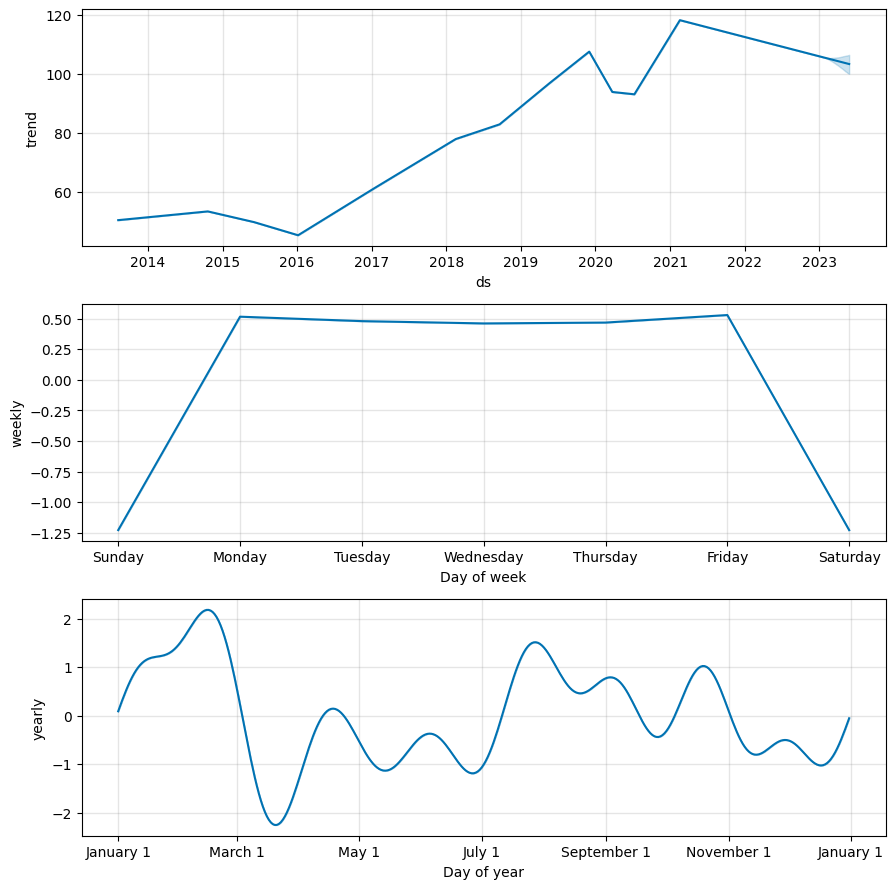

In [714]:
fig2 = m.plot_components(forecast)
fig2.show()

In [715]:
plot_plotly(m, forecast)

In [716]:
plot_components_plotly(m, forecast)